# Active Subspaces: A Simple Example


Here we mimic Paul Constantine's "basic" tutorial in active subspaces, using a different toy function of only 5 variables. All text directly copied from Paul's original notebook are cited with quotations throughout this notebook.

The function we use for demonstration is:

$$
f(x_1,x_2,x_3,x_4,x_5) = \alpha (x_1+x_2)^2+x_3^2+\epsilon x_4 + (\textit{noise})
$$

We will take $\alpha$ large $-$ of order 4 to begin with, and take $\epsilon$ small $-$ of order $-4$ to begin with. We will let the noise vary within the interval [$-\epsilon$,$\epsilon$]. Further, note that $f$ has no dependence on $x_5$; we expect that this will cause $x_5$ to be inactive. The a priori distributions of each varibale are summarized below; we begin by assuming each varibale has a uniform distribution over [-1,1] to avoid normalization.

Symbol|Distribution (U(min, max))
:-----:|:-----
$x_1$|U(-1, 1)
$x_2$|U(-1, 1)
$x_3$|U(-1, 1)
$x_4$|U(-1, 1)
$x_5$|U(-1, 1)

"For demonstration we initially pretend we don't have the gradient of $f$. In this scenario, you have 3 options: use a global linear model to approximate gradients, use a global quadratic model to approximate gradients, or use local linear models to approximate gradients. We demonstrate each in turn." - Paul C.



In [34]:
%matplotlib inline
import active_subspaces as ac
import numpy as np
import matplotlib.pyplot as plt

E = .0001 # epsilon
A = 10000 # alpha
N = np.random.uniform(-E,E) # noise


def fun(aa):
    #each row of aa should be in the normalized input space
    #returns column vector of function at each row of inputs
    
    a = aa.copy()
    a = np.atleast_2d(a)
    M = a.shape[0]
    
    x = a[:,0]; y = a[:,1]; z = a[:,2]; w = a[:,3]; q = a[:,4];
    
    return (A*(x+y)**2+z**2+E*w+N+0*q).reshape(M, 1)

def fun1(aa):
    
    return (np.log(fun(aa)))

def grad_fun(aa):
    #each row of aa should be a 5-vector in the normalized input space
    #returns matrix whose ith row is gradient of wing function at ith row of inputs
    
    a = aa.copy()
    a = np.atleast_2d(a)
    
    x = a[:,0]; y = a[:,1]; z = a[:,2]; w = a[:,3]; q = a[:,4];
 
    
    dfd1 = (2*A*x+2*A*y)[:,None]
    dfd2 = (2*A*x+2*A*y)[:,None]
    dfd3 = (2*z)[:,None]
    dfd4 = (E +0*q)[:,None]
    dfd5 = (0+0*q)[:,None]
  
        
    return np.hstack((dfd1, dfd2, dfd3, dfd4, dfd5))

"We first draw a set of inputs from the parameter space according to the distributions in the table above and compute the function's value at each of these points." - Paul C.


In [35]:
M = 1000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
x = np.random.uniform(-1, 1, (M, 1)) #x_1
y = np.random.uniform(-1, 1, (M, 1)) #x_2
z = np.random.uniform(-1, 1, (M, 1)) #x_3
w = np.random.uniform(-1, 1, (M, 1)) #x_4
q = np.random.uniform(-1, 1, (M, 1)) #x_5

#The input matrix
a = np.hstack((x, y, z, w, q))

#The function's output
f = fun(a)

#Upper and lower limits for inputs
lb = np.array([-1, -1, -1, -1, -1]).reshape((1, 5))
ub = np.array([1, 1, 1, 1, 1]).reshape((1, 5))

#ub=np.log(ub)
#lb=np.log(lb)

#We normalize the inputs to the interval [-1, 1]: 

aa = 2.*(a - lb)/(ub - lb) - 1.0

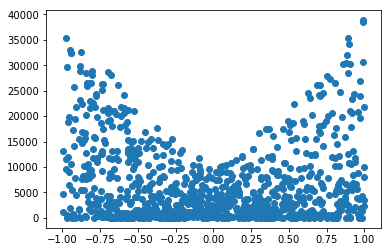

In [36]:
#plot f versus x1 & x2 and maybe versus x1+x2
plt.scatter(x,f)
plt.show()

"The following cell instantiates a subspace object and computes the active subspace by fitting a global linear model (this is indicated by the 'sstype='OLS'' flag). The 'nboot=100' flag says to use 100 bootstrap replicates to estimate variability in eigenvalue and subspace error estimates."

-Paul C.



In [37]:
#Instantiate a subspace object
ss = ac.subspaces.Subspaces()

#Compute the subspace with a global linear model (sstype='OLS') and 100 bootstrap replicates
ss.compute(X=aa, f=f, nboot=100, sstype='OLS')

"We plot estimated eigenvalues, subspace errors, and a sufficient summary plot (a plot of the active variable vs data values)."

-Paul C.

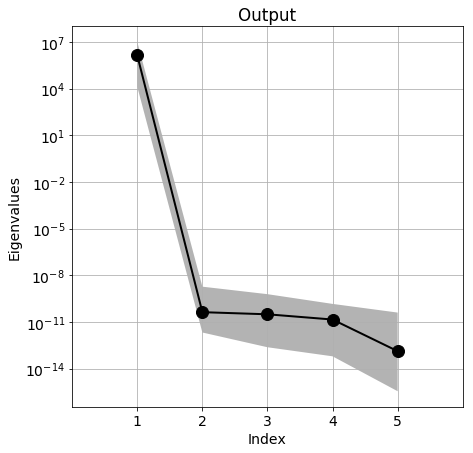

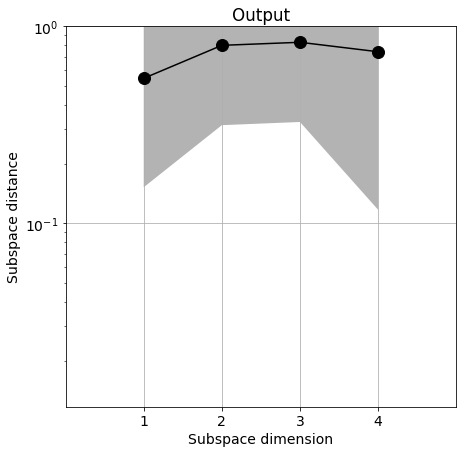

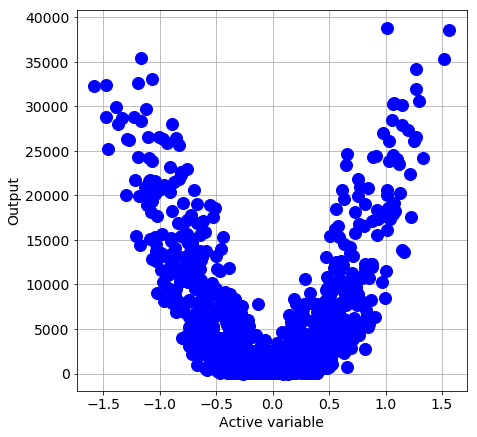

[[ 0.55113375  0.53536005  0.61559271  0.17389508  0.02115006]
 [ 0.78001472 -0.47976614 -0.3413766   0.2102295   0.02582762]
 [-0.04251601  0.08364105 -0.0910489   0.07936827  0.98823446]
 [ 0.24271071  0.58699712 -0.58396544 -0.50272908 -0.05266629]
 [ 0.16465881 -0.36283968  0.39395698 -0.81641179  0.13965863]]


In [38]:
#This plots the eigenvalues (ss.eigenvals) with bootstrap ranges (ss.e_br)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)

#This plots subspace errors with bootstrap ranges (all contained in ss.sub_br)
ac.utils.plotters.subspace_errors(ss.sub_br)

#This makes sufficient summary plots with the active variables (XX.dot(ss.W1)) and output (f)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

print(ss.eigenvecs)


"We now make the same plots with a global quadratic model (sstype='QPHD')." - Paul C.

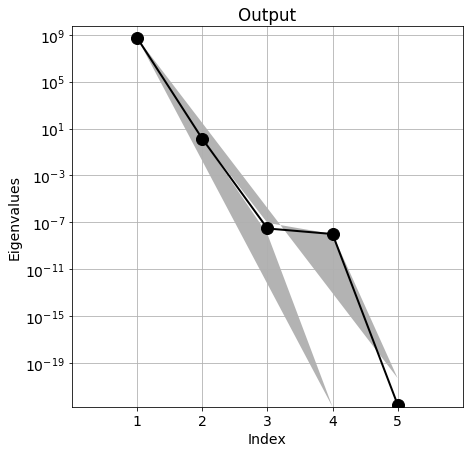

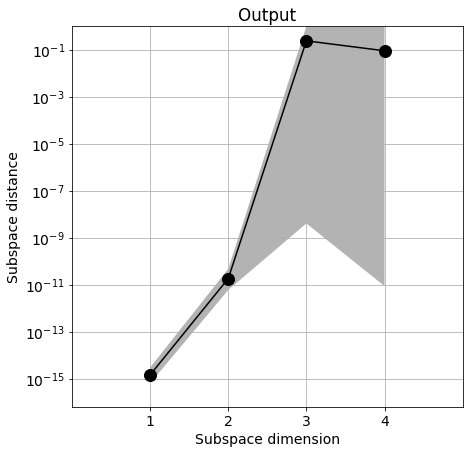

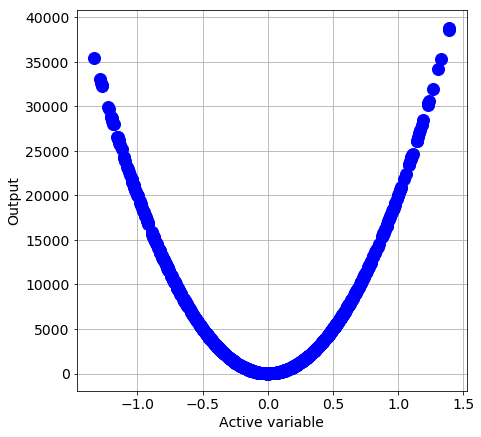

[[  7.07106781e-01   9.09631151e-13   7.07106781e-01   5.97073094e-08
    3.17166758e-16]
 [  7.07106781e-01  -9.09358293e-13  -7.07106781e-01  -5.97073081e-08
    9.67486409e-16]
 [ -1.92939392e-16   1.00000000e+00  -1.28622092e-12   1.36417384e-11
   -8.41282661e-12]
 [ -9.28992310e-16  -1.36417389e-11  -8.44388858e-08   1.00000000e+00
   -4.54747282e-08]
 [ -9.08392693e-16   8.41282599e-12  -3.37730193e-15   4.54747282e-08
    1.00000000e+00]]


In [39]:
ss.compute(X=aa, f=f, nboot=100, sstype='QPHD')
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)
print(ss.eigenvecs)

"We now use local linear models to approximate gradients and make the same plots as above." - Paul C.

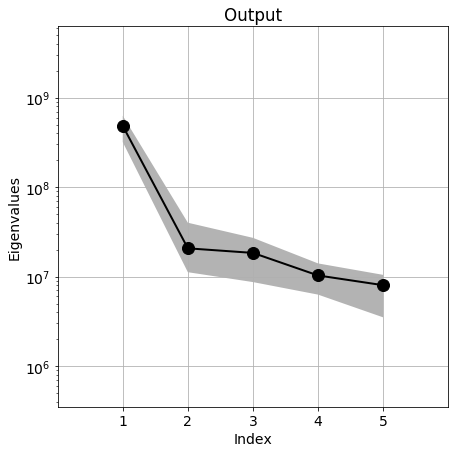

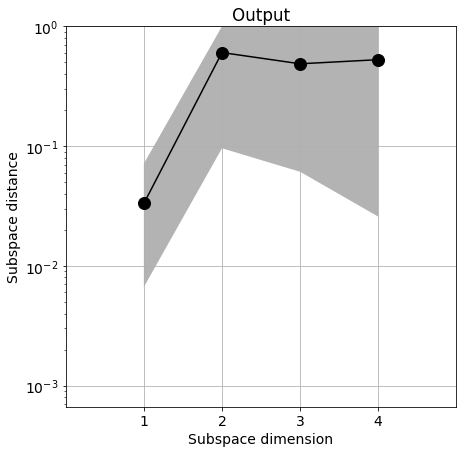

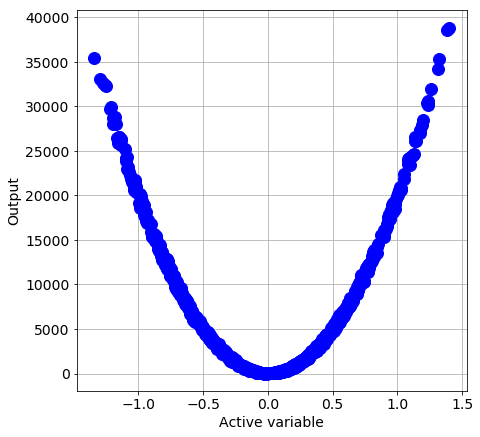

In [40]:
df = ac.gradients.local_linear_gradients(aa, f) #Estimated gradients using local linear models

ss.compute(df=df, nboot=100)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

In [28]:
import pprint

print ss.eigenvecs

print grad_fun(a)


[[ 0.64306263  0.64807908  0.20018481  0.27665169  0.22327976]
 [ 0.76271599 -0.49598602 -0.22198839 -0.2649496  -0.22974999]
 [-0.03558704  0.33917474  0.24504609 -0.16957457 -0.89156657]
 [ 0.05283109 -0.34239142  0.921998   -0.10109264  0.14027458]
 [ 0.02602352 -0.3189357   0.02278817  0.90238035 -0.28773807]]
[[  3.28247481e+04   3.28247481e+04   1.52103977e-01   1.00000000e-04
    0.00000000e+00]
 [  2.42011560e+03   2.42011560e+03   3.76983391e-01   1.00000000e-04
    0.00000000e+00]
 [  1.87107904e+03   1.87107904e+03  -1.92019134e+00   1.00000000e-04
    0.00000000e+00]
 [  3.96909791e+03   3.96909791e+03  -1.92163689e+00   1.00000000e-04
    0.00000000e+00]
 [ -1.11996151e+04  -1.11996151e+04   2.98703093e-01   1.00000000e-04
    0.00000000e+00]
 [ -7.40098505e+03  -7.40098505e+03  -1.75373616e+00   1.00000000e-04
    0.00000000e+00]
 [  1.32481850e+04   1.32481850e+04   1.02540917e+00   1.00000000e-04
    0.00000000e+00]
 [ -1.49060851e+02  -1.49060851e+02  -1.60054630e+00  

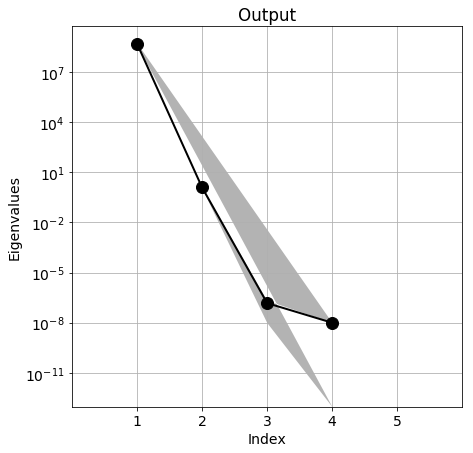

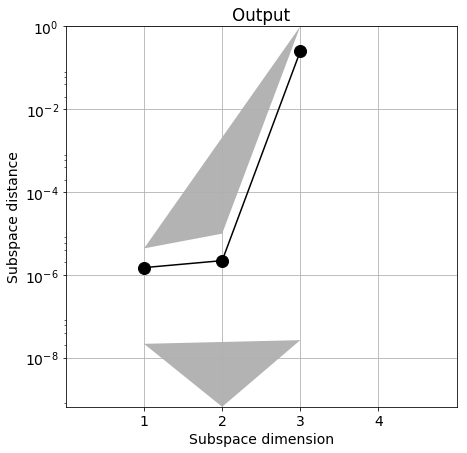

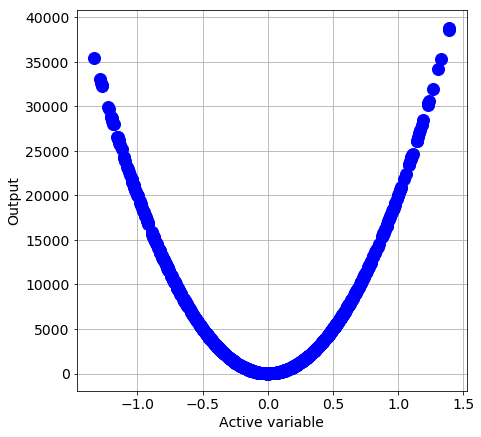

In [41]:
df = grad_fun(a) #Analytically computed gradients

#Chain Rule
#df *= (ub - lb)/2.
#Additional chain rule factor for going from degrees to radians (??????????)
#df[:,3] *= np.pi/180.

ss.compute(df=df, nboot=100)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

The R^2 value of the response surface is 1.0000
2.32899753627


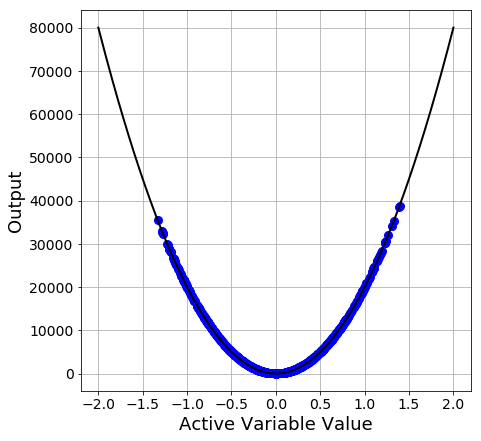

In [49]:
#quadratic polynomial approximation
RS = ac.utils.response_surfaces.PolynomialApproximation(2)

#Train the surface with active variable values (y = aa.dot(ss.W1)) and function values (f)
y = aa.dot(ss.W1)
RS.train(y, f)
print 'The R^2 value of the response surface is {:.4f}'.format(RS.Rsqr)

#Plot the data and response surface prediction
plt.figure(figsize=(7, 7))
y0 = np.linspace(-2, 2, 200)
plt.plot(y, f, 'bo', y0, RS.predict(y0[:,None])[0], 'k-', linewidth=2, markersize=8)
plt.grid(True)
plt.xlabel('Active Variable Value', fontsize=18)
plt.ylabel('Output', fontsize=18)
print(np.min(RS.predict(y0[:,None])[0]))

In [43]:
avdom = ac.domains.BoundedActiveVariableDomain(ss)
avmap = ac.domains.BoundedActiveVariableMap(avdom)

In [44]:
#import time for runtime comparison
import time

tb_as = time.time()

#Approximate the average of the quantity of interest by integrating the response surface
int_I = ac.integrals.av_integrate(lambda x: RS.predict(x)[0], avmap, 1000)
print 'The estimated average using the response surface is {:.2f}'.format(int_I)

te_as = time.time()

tb_mc = time.time()

#Approximate the average using simple Monte Carlo with M replicates
M = int(1e7)
X = np.random.uniform(-1, 1, (M, 5))
X = lb + (ub - lb)/2.*(X + 1)
MC_f = fun(X)
MC_I = MC_f.sum()/M
MCSE = MC_f.std(ddof=1)/np.sqrt(M)
print 'The estimated average using standard Monte Carlo is {:.2f} with 95% CI ({:.2f}, {:.2f})'\
    .format(MC_I, MC_I - 1.96*MCSE, MC_I + 1.96*MCSE)
    
te_mc = time.time()

print 'Active subspaces took {:.1f} seconds and MCMC took {:.1f} seconds'\
    .format(te_as - tb_as, te_mc - tb_mc)

The estimated average using the response surface is 6581.33
The estimated average using standard Monte Carlo is 6664.46 with 95% CI (6659.57, 6669.35)
Active subspaces took 0.0 seconds and MCMC took 1.0 seconds


In [45]:
#Minimize using the response surface
ystar, fstar = ac.optimizers.av_minimize(lambda x: RS.predict(x.reshape(1,1))[0], avdom)
print 'The response surface optimization results are\n: ystar = {:.4f}, fstar = {:.4f}\n'.\
    format(ystar[0,0], fstar[0,0])

#Minimize using scipy
import scipy.optimize as opt
#fun_n takes normalized inputs while wing takes unnormalized inputs
fun_n = lambda x: fun(lb + (ub - lb)/2.*(x + 1))
scipy_res = opt.minimize(fun_n, np.zeros(5), bounds=(zip(-1*np.ones(5), np.ones(5))))
print 'The scipy optimization results are:'
print 'xstar = {}, fstar = {:.4f}'.format(scipy_res['x'], scipy_res['fun'][0,0])
print 'xstar*W1 = {:.4f}'.format(scipy_res['x'].reshape((1, 5)).dot(ss.W1)[0,0])

The response surface optimization results are
: ystar = 0.0000, fstar = 0.3091

The scipy optimization results are:
xstar = [ -9.37406252e-10  -9.37406252e-10  -9.37381155e-14  -9.37406259e-10
   0.00000000e+00], fstar = 0.0000
xstar*W1 = -0.0000
